In [1]:
import os, importlib, sys, time

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import scipy.linalg as la
import scipy.stats as stats
import scipy.optimize as opt

In [4]:
import freqepid

# 1. parameters

In [5]:
T = 120
T0 = 40

In [6]:
GPi = np.load('data/GPi.npz')

## observation parameters

In [7]:
r_Y = 10

$$Y_t = NegBinom( \frac{EY_t}{r_Y + EY_t}, r_Y )$$

$$ EY_t = \alpha\sum_{s=1}^{t-1} I_s \pi_{t-s} $$

## latent parameters

In [8]:
d=3
betas = np.array([
    np.linspace(-np.log(5.5)+1, -np.log(5.5)+2, 21),     
    np.linspace(-1.5, -1.5, 21),
    np.linspace(0, -1, 21),
]).T

In [9]:
r_I = 10
K = 6.5

$$I_t = NegBinom( \frac{EI_t}{r_I + EI_t}, r_I )$$

$$ EI_t = R(\bar{A}_t, \beta) \sum_{s=1}^{t-1} I_s g_{t-s} $$

$$R(\bar{A}_t, \beta) = \frac{K}{1+\exp(- \beta^\top A_t)}$$

## seed values

In [10]:
mu = np.log(100)

$$I_{[-T_0,0)} = \exp(\mu_0)$$

## simulation setting

In [11]:
num_beta = 21
num_sim = 100

# 2. Fit

In [12]:
model = freqepid.Model(GPi['g'], [1], 1, K, T0, "nbinom")

In [13]:
nsim = np.zeros((num_beta,num_sim))
msim = np.zeros((num_beta,num_sim))
bsim = np.zeros((num_beta,num_sim,d))

In [14]:
for iter_beta, beta in enumerate(betas):
    data = pd.read_feather('data/simulation_no_phantom_%d.feather'%iter_beta)
    
    for iter_sim in np.arange(num_sim):
        start_sim = time.time()
        
        data_i = data[data['sim']==iter_sim]
        A = np.stack([np.full(T, 1), data_i["covariate"].to_numpy(), 
                      data_i["intervention"].to_numpy()], -1)
        Y = data_i["death"].to_numpy()
        
        # fit
        nmle, mmle, bmle, ll =\
        model.fit(A, Y, n_iter=100, step_size=1,
                  history=False, verbose=False)
        
        nsim[iter_beta,iter_sim] = nmle
        msim[iter_beta,iter_sim] = mmle
        bsim[iter_beta,iter_sim,:] = bmle
        
        sys.__stdout__.write("%d-%d-th simulation finished, %f sec.\n"
                             %(iter_beta+1, iter_sim+1, time.time()-start_sim))
        sys.__stdout__.flush()

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


1-1-th simulation finished, 2.444212 sec.
1-2-th simulation finished, 2.344042 sec.
1-3-th simulation finished, 2.633331 sec.
1-4-th simulation finished, 3.946525 sec.
1-5-th simulation finished, 2.332364 sec.
1-6-th simulation finished, 2.058497 sec.
1-7-th simulation finished, 2.623742 sec.
1-8-th simulation finished, 2.519782 sec.
1-9-th simulation finished, 2.308972 sec.
1-10-th simulation finished, 2.997865 sec.
1-11-th simulation finished, 2.204531 sec.
1-12-th simulation finished, 2.459148 sec.
1-13-th simulation finished, 2.825399 sec.
1-14-th simulation finished, 5.505940 sec.
1-15-th simulation finished, 3.071446 sec.
1-16-th simulation finished, 3.299021 sec.
1-17-th simulation finished, 2.205886 sec.
1-18-th simulation finished, 2.960531 sec.
1-19-th simulation finished, 2.790342 sec.
1-20-th simulation finished, 1.876422 sec.
1-21-th simulation finished, 3.359725 sec.
1-22-th simulation finished, 3.464655 sec.
1-23-th simulation finished, 3.249673 sec.
1-24-th simulation f

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


2-1-th simulation finished, 1.901333 sec.
2-2-th simulation finished, 2.571459 sec.
2-3-th simulation finished, 2.315909 sec.
2-4-th simulation finished, 2.646445 sec.
2-5-th simulation finished, 3.714684 sec.
2-6-th simulation finished, 2.380228 sec.
2-7-th simulation finished, 2.331661 sec.
2-8-th simulation finished, 1.904029 sec.
2-9-th simulation finished, 2.882563 sec.
2-10-th simulation finished, 2.188823 sec.
2-11-th simulation finished, 2.331702 sec.
2-12-th simulation finished, 6.555498 sec.
2-13-th simulation finished, 2.249681 sec.
2-14-th simulation finished, 2.725494 sec.
2-15-th simulation finished, 2.175734 sec.
2-16-th simulation finished, 2.775894 sec.
2-17-th simulation finished, 2.422053 sec.
2-18-th simulation finished, 2.677152 sec.
2-19-th simulation finished, 1.987298 sec.
2-20-th simulation finished, 2.623786 sec.
2-21-th simulation finished, 2.109562 sec.
2-22-th simulation finished, 4.036924 sec.
2-23-th simulation finished, 3.397563 sec.
2-24-th simulation f

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


3-1-th simulation finished, 2.068364 sec.
3-2-th simulation finished, 2.441166 sec.
3-3-th simulation finished, 1.893472 sec.
3-4-th simulation finished, 2.823485 sec.
3-5-th simulation finished, 1.896089 sec.
3-6-th simulation finished, 1.827107 sec.
3-7-th simulation finished, 9.578132 sec.
3-8-th simulation finished, 2.577997 sec.
3-9-th simulation finished, 2.246766 sec.
3-10-th simulation finished, 2.764951 sec.
3-11-th simulation finished, 2.719186 sec.
3-12-th simulation finished, 2.358798 sec.
3-13-th simulation finished, 2.963872 sec.
3-14-th simulation finished, 2.724463 sec.
3-15-th simulation finished, 3.036521 sec.
3-16-th simulation finished, 2.983883 sec.
3-17-th simulation finished, 2.552032 sec.
3-18-th simulation finished, 4.412291 sec.
3-19-th simulation finished, 2.401719 sec.
3-20-th simulation finished, 2.345577 sec.
3-21-th simulation finished, 1.576185 sec.
3-22-th simulation finished, 2.663383 sec.
3-23-th simulation finished, 2.337700 sec.
3-24-th simulation f

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


4-1-th simulation finished, 2.226580 sec.
4-2-th simulation finished, 1.613923 sec.
4-3-th simulation finished, 2.243582 sec.
4-4-th simulation finished, 3.492409 sec.
4-5-th simulation finished, 3.709747 sec.
4-6-th simulation finished, 4.209825 sec.
4-7-th simulation finished, 2.554052 sec.
4-8-th simulation finished, 2.412302 sec.
4-9-th simulation finished, 2.251797 sec.
4-10-th simulation finished, 3.110728 sec.
4-11-th simulation finished, 3.070131 sec.
4-12-th simulation finished, 2.906323 sec.
4-13-th simulation finished, 3.005883 sec.
4-14-th simulation finished, 2.844798 sec.
4-15-th simulation finished, 2.714493 sec.
4-16-th simulation finished, 3.015475 sec.
4-17-th simulation finished, 4.096458 sec.
4-18-th simulation finished, 2.267230 sec.
4-19-th simulation finished, 2.091451 sec.
4-20-th simulation finished, 4.440768 sec.
4-21-th simulation finished, 3.014415 sec.
4-22-th simulation finished, 2.882703 sec.
4-23-th simulation finished, 2.475224 sec.
4-24-th simulation f

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


5-1-th simulation finished, 2.482841 sec.
5-2-th simulation finished, 3.182147 sec.
5-3-th simulation finished, 3.567325 sec.
5-4-th simulation finished, 1.931853 sec.
5-5-th simulation finished, 2.392980 sec.
5-6-th simulation finished, 5.173285 sec.
5-7-th simulation finished, 3.780109 sec.
5-8-th simulation finished, 2.836261 sec.
5-9-th simulation finished, 2.351369 sec.
5-10-th simulation finished, 2.208262 sec.
5-11-th simulation finished, 2.376948 sec.
5-12-th simulation finished, 5.557390 sec.
5-13-th simulation finished, 2.924630 sec.
5-14-th simulation finished, 1.858243 sec.
5-15-th simulation finished, 2.557593 sec.
5-16-th simulation finished, 1.852909 sec.
5-17-th simulation finished, 2.047004 sec.
5-18-th simulation finished, 3.136317 sec.
5-19-th simulation finished, 2.414833 sec.
5-20-th simulation finished, 2.915921 sec.
5-21-th simulation finished, 2.767253 sec.
5-22-th simulation finished, 2.332423 sec.
5-23-th simulation finished, 2.586564 sec.
5-24-th simulation f

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


6-1-th simulation finished, 2.333554 sec.
6-2-th simulation finished, 2.411669 sec.
6-3-th simulation finished, 3.023743 sec.
6-4-th simulation finished, 2.232697 sec.
6-5-th simulation finished, 2.739115 sec.
6-6-th simulation finished, 2.532931 sec.
6-7-th simulation finished, 2.356136 sec.
6-8-th simulation finished, 4.089744 sec.
6-9-th simulation finished, 2.525901 sec.
6-10-th simulation finished, 1.999539 sec.
6-11-th simulation finished, 2.647536 sec.
6-12-th simulation finished, 2.527463 sec.
6-13-th simulation finished, 2.860424 sec.
6-14-th simulation finished, 2.190440 sec.
6-15-th simulation finished, 2.418390 sec.
6-16-th simulation finished, 2.254306 sec.
6-17-th simulation finished, 3.663058 sec.
6-18-th simulation finished, 2.202048 sec.
6-19-th simulation finished, 2.656762 sec.
6-20-th simulation finished, 2.583505 sec.
6-21-th simulation finished, 2.588717 sec.
6-22-th simulation finished, 2.468920 sec.
6-23-th simulation finished, 1.729174 sec.
6-24-th simulation f

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


7-1-th simulation finished, 1.996464 sec.
7-2-th simulation finished, 4.203174 sec.
7-3-th simulation finished, 2.837347 sec.
7-4-th simulation finished, 2.638993 sec.
7-5-th simulation finished, 2.145610 sec.
7-6-th simulation finished, 2.755947 sec.
7-7-th simulation finished, 4.245579 sec.
7-8-th simulation finished, 2.522113 sec.
7-9-th simulation finished, 2.855481 sec.
7-10-th simulation finished, 2.996199 sec.
7-11-th simulation finished, 2.876952 sec.
7-12-th simulation finished, 3.634070 sec.
7-13-th simulation finished, 4.953268 sec.
7-14-th simulation finished, 3.481391 sec.
7-15-th simulation finished, 3.266256 sec.
7-16-th simulation finished, 2.932569 sec.
7-17-th simulation finished, 2.297373 sec.
7-18-th simulation finished, 3.329626 sec.
7-19-th simulation finished, 2.150278 sec.
7-20-th simulation finished, 4.597974 sec.
7-21-th simulation finished, 2.087459 sec.
7-22-th simulation finished, 2.288130 sec.
7-23-th simulation finished, 2.288583 sec.
7-24-th simulation f

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


8-1-th simulation finished, 1.831064 sec.
8-2-th simulation finished, 2.174417 sec.
8-3-th simulation finished, 2.401125 sec.
8-4-th simulation finished, 2.445237 sec.
8-5-th simulation finished, 3.461248 sec.
8-6-th simulation finished, 1.421487 sec.
8-7-th simulation finished, 3.860468 sec.
8-8-th simulation finished, 2.833198 sec.
8-9-th simulation finished, 2.357128 sec.
8-10-th simulation finished, 4.180936 sec.
8-11-th simulation finished, 1.754139 sec.
8-12-th simulation finished, 2.252992 sec.
8-13-th simulation finished, 3.351409 sec.
8-14-th simulation finished, 3.542889 sec.
8-15-th simulation finished, 2.567059 sec.
8-16-th simulation finished, 2.257783 sec.
8-17-th simulation finished, 2.202844 sec.
8-18-th simulation finished, 2.449620 sec.
8-19-th simulation finished, 2.494028 sec.
8-20-th simulation finished, 3.264692 sec.
8-21-th simulation finished, 5.926847 sec.
8-22-th simulation finished, 2.753995 sec.
8-23-th simulation finished, 3.353443 sec.
8-24-th simulation f

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


9-1-th simulation finished, 2.051473 sec.
9-2-th simulation finished, 1.770462 sec.
9-3-th simulation finished, 3.408532 sec.
9-4-th simulation finished, 2.823811 sec.
9-5-th simulation finished, 2.704176 sec.
9-6-th simulation finished, 4.248881 sec.
9-7-th simulation finished, 4.052101 sec.
9-8-th simulation finished, 2.433339 sec.
9-9-th simulation finished, 2.174798 sec.
9-10-th simulation finished, 2.337533 sec.
9-11-th simulation finished, 2.020982 sec.
9-12-th simulation finished, 1.722491 sec.
9-13-th simulation finished, 2.664389 sec.
9-14-th simulation finished, 3.054894 sec.
9-15-th simulation finished, 2.225318 sec.
9-16-th simulation finished, 2.171754 sec.
9-17-th simulation finished, 4.153226 sec.
9-18-th simulation finished, 2.416941 sec.
9-19-th simulation finished, 2.480424 sec.
9-20-th simulation finished, 2.444588 sec.
9-21-th simulation finished, 2.781203 sec.
9-22-th simulation finished, 2.586483 sec.
9-23-th simulation finished, 2.127380 sec.
9-24-th simulation f

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


10-1-th simulation finished, 2.664105 sec.
10-2-th simulation finished, 2.754499 sec.
10-3-th simulation finished, 2.434015 sec.
10-4-th simulation finished, 2.625425 sec.
10-5-th simulation finished, 2.859145 sec.
10-6-th simulation finished, 2.901575 sec.
10-7-th simulation finished, 2.464673 sec.
10-8-th simulation finished, 2.026926 sec.
10-9-th simulation finished, 2.636665 sec.
10-10-th simulation finished, 2.322194 sec.
10-11-th simulation finished, 2.109398 sec.
10-12-th simulation finished, 3.077822 sec.
10-13-th simulation finished, 3.380991 sec.
10-14-th simulation finished, 2.063406 sec.
10-15-th simulation finished, 2.806260 sec.
10-16-th simulation finished, 3.287632 sec.
10-17-th simulation finished, 3.582158 sec.
10-18-th simulation finished, 2.188097 sec.
10-19-th simulation finished, 1.999710 sec.
10-20-th simulation finished, 3.568022 sec.
10-21-th simulation finished, 3.633462 sec.
10-22-th simulation finished, 4.036211 sec.
10-23-th simulation finished, 3.930323 se

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


11-1-th simulation finished, 3.621775 sec.
11-2-th simulation finished, 3.056230 sec.
11-3-th simulation finished, 1.982608 sec.
11-4-th simulation finished, 2.331567 sec.
11-5-th simulation finished, 2.949902 sec.
11-6-th simulation finished, 3.001547 sec.
11-7-th simulation finished, 3.131989 sec.
11-8-th simulation finished, 2.901322 sec.
11-9-th simulation finished, 2.498263 sec.
11-10-th simulation finished, 3.147953 sec.
11-11-th simulation finished, 3.308120 sec.
11-12-th simulation finished, 2.407077 sec.
11-13-th simulation finished, 3.514930 sec.
11-14-th simulation finished, 2.767114 sec.
11-15-th simulation finished, 2.682101 sec.
11-16-th simulation finished, 3.256692 sec.
11-17-th simulation finished, 2.226317 sec.
11-18-th simulation finished, 2.656391 sec.
11-19-th simulation finished, 2.173012 sec.
11-20-th simulation finished, 3.244130 sec.
11-21-th simulation finished, 2.997484 sec.
11-22-th simulation finished, 2.754091 sec.
11-23-th simulation finished, 2.438447 se

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


12-1-th simulation finished, 2.929363 sec.
12-2-th simulation finished, 6.326279 sec.
12-3-th simulation finished, 2.421929 sec.
12-4-th simulation finished, 2.294206 sec.
12-5-th simulation finished, 2.468136 sec.
12-6-th simulation finished, 5.255616 sec.
12-7-th simulation finished, 1.890769 sec.
12-8-th simulation finished, 3.331272 sec.
12-9-th simulation finished, 3.602164 sec.
12-10-th simulation finished, 2.843756 sec.
12-11-th simulation finished, 2.730742 sec.
12-12-th simulation finished, 4.020311 sec.
12-13-th simulation finished, 3.008029 sec.
12-14-th simulation finished, 2.490976 sec.
12-15-th simulation finished, 3.349028 sec.
12-16-th simulation finished, 2.335464 sec.
12-17-th simulation finished, 2.136786 sec.
12-18-th simulation finished, 2.848868 sec.
12-19-th simulation finished, 1.988551 sec.
12-20-th simulation finished, 1.897381 sec.
12-21-th simulation finished, 3.922474 sec.
12-22-th simulation finished, 3.002682 sec.
12-23-th simulation finished, 2.429587 se

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


13-1-th simulation finished, 2.870095 sec.
13-2-th simulation finished, 3.042995 sec.
13-3-th simulation finished, 2.521993 sec.
13-4-th simulation finished, 2.577817 sec.
13-5-th simulation finished, 3.216194 sec.
13-6-th simulation finished, 2.920019 sec.
13-7-th simulation finished, 2.259868 sec.
13-8-th simulation finished, 2.683178 sec.
13-9-th simulation finished, 2.292788 sec.
13-10-th simulation finished, 3.548267 sec.
13-11-th simulation finished, 2.264721 sec.
13-12-th simulation finished, 2.513539 sec.
13-13-th simulation finished, 4.881802 sec.
13-14-th simulation finished, 2.182631 sec.
13-15-th simulation finished, 2.505162 sec.
13-16-th simulation finished, 2.412680 sec.
13-17-th simulation finished, 2.467404 sec.
13-18-th simulation finished, 4.054819 sec.
13-19-th simulation finished, 2.637814 sec.
13-20-th simulation finished, 3.672822 sec.
13-21-th simulation finished, 2.942199 sec.
13-22-th simulation finished, 2.259368 sec.
13-23-th simulation finished, 2.501783 se

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


14-1-th simulation finished, 3.433221 sec.
14-2-th simulation finished, 3.632716 sec.
14-3-th simulation finished, 3.287894 sec.
14-4-th simulation finished, 2.741819 sec.
14-5-th simulation finished, 2.176227 sec.
14-6-th simulation finished, 2.861015 sec.
14-7-th simulation finished, 3.795117 sec.
14-8-th simulation finished, 2.494223 sec.
14-9-th simulation finished, 3.399327 sec.
14-10-th simulation finished, 3.446383 sec.
14-11-th simulation finished, 2.973000 sec.
14-12-th simulation finished, 2.357100 sec.
14-13-th simulation finished, 3.754739 sec.
14-14-th simulation finished, 3.754803 sec.
14-15-th simulation finished, 2.533762 sec.
14-16-th simulation finished, 1.774819 sec.
14-17-th simulation finished, 4.352678 sec.
14-18-th simulation finished, 2.511550 sec.
14-19-th simulation finished, 3.311434 sec.
14-20-th simulation finished, 2.208428 sec.
14-21-th simulation finished, 2.592100 sec.
14-22-th simulation finished, 2.640660 sec.
14-23-th simulation finished, 3.513218 se

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


15-1-th simulation finished, 2.046673 sec.
15-2-th simulation finished, 3.251369 sec.
15-3-th simulation finished, 3.124656 sec.
15-4-th simulation finished, 2.377895 sec.
15-5-th simulation finished, 2.541087 sec.
15-6-th simulation finished, 2.385373 sec.
15-7-th simulation finished, 2.876599 sec.
15-8-th simulation finished, 1.974519 sec.
15-9-th simulation finished, 2.644853 sec.
15-10-th simulation finished, 2.718861 sec.
15-11-th simulation finished, 3.948149 sec.
15-12-th simulation finished, 2.112125 sec.
15-13-th simulation finished, 2.630853 sec.
15-14-th simulation finished, 3.332497 sec.
15-15-th simulation finished, 3.295471 sec.
15-16-th simulation finished, 4.045053 sec.
15-17-th simulation finished, 2.690461 sec.
15-18-th simulation finished, 3.660429 sec.
15-19-th simulation finished, 2.044911 sec.
15-20-th simulation finished, 3.167088 sec.
15-21-th simulation finished, 2.097308 sec.
15-22-th simulation finished, 2.639945 sec.
15-23-th simulation finished, 2.631546 se

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


16-1-th simulation finished, 4.904379 sec.
16-2-th simulation finished, 3.032549 sec.
16-3-th simulation finished, 2.420842 sec.
16-4-th simulation finished, 17.355664 sec.
16-5-th simulation finished, 3.904192 sec.
16-6-th simulation finished, 2.252986 sec.
16-7-th simulation finished, 2.367967 sec.
16-8-th simulation finished, 3.690215 sec.
16-9-th simulation finished, 2.619945 sec.
16-10-th simulation finished, 4.289816 sec.
16-11-th simulation finished, 2.841685 sec.
16-12-th simulation finished, 4.723106 sec.
16-13-th simulation finished, 4.904472 sec.
16-14-th simulation finished, 2.863830 sec.
16-15-th simulation finished, 2.593065 sec.
16-16-th simulation finished, 2.644278 sec.
16-17-th simulation finished, 2.611682 sec.
16-18-th simulation finished, 2.312161 sec.
16-19-th simulation finished, 2.807330 sec.
16-20-th simulation finished, 3.294835 sec.
16-21-th simulation finished, 5.049633 sec.
16-22-th simulation finished, 3.042457 sec.
16-23-th simulation finished, 2.590301 s

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


17-1-th simulation finished, 5.094073 sec.
17-2-th simulation finished, 3.628648 sec.
17-3-th simulation finished, 2.565117 sec.
17-4-th simulation finished, 2.291364 sec.
17-5-th simulation finished, 2.948400 sec.
17-6-th simulation finished, 2.901583 sec.
17-7-th simulation finished, 2.445127 sec.
17-8-th simulation finished, 2.849019 sec.
17-9-th simulation finished, 3.362075 sec.
17-10-th simulation finished, 2.957005 sec.
17-11-th simulation finished, 2.880951 sec.
17-12-th simulation finished, 3.213020 sec.
17-13-th simulation finished, 2.469519 sec.
17-14-th simulation finished, 1.814398 sec.
17-15-th simulation finished, 2.380854 sec.
17-16-th simulation finished, 2.658422 sec.
17-17-th simulation finished, 3.655287 sec.
17-18-th simulation finished, 2.413302 sec.
17-19-th simulation finished, 65.840592 sec.
17-20-th simulation finished, 4.756877 sec.
17-21-th simulation finished, 2.331181 sec.
17-22-th simulation finished, 2.022489 sec.
17-23-th simulation finished, 2.806506 s

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


18-1-th simulation finished, 2.968810 sec.
18-2-th simulation finished, 3.148239 sec.
18-3-th simulation finished, 1.862329 sec.
18-4-th simulation finished, 3.551634 sec.
18-5-th simulation finished, 2.569280 sec.
18-6-th simulation finished, 4.410054 sec.
18-7-th simulation finished, 2.678227 sec.
18-8-th simulation finished, 2.770233 sec.
18-9-th simulation finished, 2.824204 sec.
18-10-th simulation finished, 2.464382 sec.
18-11-th simulation finished, 2.293561 sec.
18-12-th simulation finished, 4.482256 sec.
18-13-th simulation finished, 2.924690 sec.
18-14-th simulation finished, 3.221928 sec.
18-15-th simulation finished, 2.444103 sec.
18-16-th simulation finished, 3.444397 sec.
18-17-th simulation finished, 2.633101 sec.
18-18-th simulation finished, 2.579683 sec.
18-19-th simulation finished, 2.798907 sec.
18-20-th simulation finished, 2.608561 sec.
18-21-th simulation finished, 2.346281 sec.
18-22-th simulation finished, 2.753650 sec.
18-23-th simulation finished, 2.945261 se

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


19-1-th simulation finished, 1.939066 sec.
19-2-th simulation finished, 3.035667 sec.
19-3-th simulation finished, 2.453321 sec.
19-4-th simulation finished, 4.388241 sec.
19-5-th simulation finished, 2.325053 sec.
19-6-th simulation finished, 4.236414 sec.
19-7-th simulation finished, 2.333096 sec.
19-8-th simulation finished, 2.381009 sec.
19-9-th simulation finished, 2.952328 sec.
19-10-th simulation finished, 2.685482 sec.
19-11-th simulation finished, 3.134418 sec.
19-12-th simulation finished, 3.137398 sec.
19-13-th simulation finished, 3.106675 sec.
19-14-th simulation finished, 1.967749 sec.
19-15-th simulation finished, 2.228295 sec.
19-16-th simulation finished, 2.333425 sec.
19-17-th simulation finished, 3.032665 sec.
19-18-th simulation finished, 4.649239 sec.
19-19-th simulation finished, 2.047223 sec.
19-20-th simulation finished, 3.379480 sec.
19-21-th simulation finished, 3.662141 sec.
19-22-th simulation finished, 2.622038 sec.
19-23-th simulation finished, 2.141848 se

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


20-1-th simulation finished, 3.472464 sec.
20-2-th simulation finished, 4.218653 sec.
20-3-th simulation finished, 2.307442 sec.
20-4-th simulation finished, 3.049299 sec.
20-5-th simulation finished, 3.020545 sec.
20-6-th simulation finished, 2.728243 sec.
20-7-th simulation finished, 3.315978 sec.
20-8-th simulation finished, 2.133193 sec.
20-9-th simulation finished, 3.295010 sec.
20-10-th simulation finished, 3.617300 sec.
20-11-th simulation finished, 3.034957 sec.
20-12-th simulation finished, 3.046063 sec.
20-13-th simulation finished, 3.030041 sec.
20-14-th simulation finished, 2.593751 sec.
20-15-th simulation finished, 2.184164 sec.
20-16-th simulation finished, 2.794867 sec.
20-17-th simulation finished, 2.362138 sec.
20-18-th simulation finished, 2.647377 sec.
20-19-th simulation finished, 7.446277 sec.
20-20-th simulation finished, 3.054431 sec.
20-21-th simulation finished, 2.725619 sec.
20-22-th simulation finished, 3.224400 sec.
20-23-th simulation finished, 3.387539 se

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


21-1-th simulation finished, 3.262934 sec.
21-2-th simulation finished, 5.561648 sec.
21-3-th simulation finished, 4.032967 sec.
21-4-th simulation finished, 3.705012 sec.
21-5-th simulation finished, 3.075349 sec.
21-6-th simulation finished, 5.135972 sec.
21-7-th simulation finished, 2.646557 sec.
21-8-th simulation finished, 2.838359 sec.
21-9-th simulation finished, 2.306827 sec.
21-10-th simulation finished, 3.444709 sec.
21-11-th simulation finished, 4.468908 sec.
21-12-th simulation finished, 4.614861 sec.
21-13-th simulation finished, 4.728836 sec.
21-14-th simulation finished, 2.421984 sec.
21-15-th simulation finished, 5.312646 sec.
21-16-th simulation finished, 2.725254 sec.
21-17-th simulation finished, 2.778180 sec.
21-18-th simulation finished, 4.758373 sec.
21-19-th simulation finished, 3.004167 sec.
21-20-th simulation finished, 2.305388 sec.
21-21-th simulation finished, 4.297506 sec.
21-22-th simulation finished, 2.203456 sec.
21-23-th simulation finished, 2.937831 se

In [15]:
np.savez('result_no_phantom_ML.npz',
         nsim = nsim, msim = msim, bsim = bsim)

# 3. Result

In [12]:
result = np.load('result_no_phantom_ML.npz')
bsim = result['bsim']

In [13]:
from matplotlib import ticker

In [14]:
betas[:,-1]

array([ 0.  , -0.05, -0.1 , -0.15, -0.2 , -0.25, -0.3 , -0.35, -0.4 ,
       -0.45, -0.5 , -0.55, -0.6 , -0.65, -0.7 , -0.75, -0.8 , -0.85,
       -0.9 , -0.95, -1.  ])

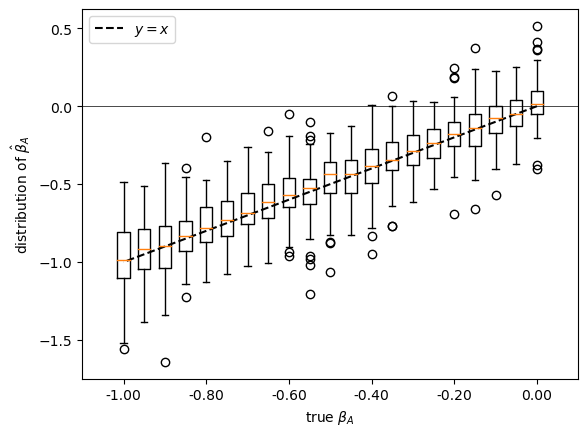

In [15]:
plt.boxplot(bsim[:,:,-1].T, positions=betas[:,-1], widths=0.03)
plt.plot(betas[:,-1], betas[:,-1], linestyle='--', color='black', label=r'$y=x$')
plt.axhline(y=0, linewidth=0.5, color='black')
plt.xlim(np.min(betas[:,-1])-0.1, np.max(betas[:,-1])+0.1)
plt.xticks(np.linspace(np.min(betas[:,-1]), np.max(betas[:,-1]), 6), 
           np.linspace(np.min(betas[:,-1]), np.max(betas[:,-1]), 6))
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
plt.ylabel(r'distribution of $\hat\beta_A$'); plt.xlabel(r'true $\beta_A$'); plt.legend()
plt.show()

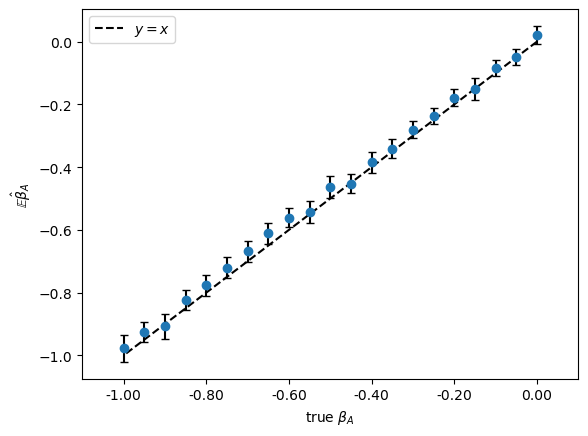

In [17]:
plt.errorbar(betas[:,-1], np.mean(bsim[:,:,-1], -1), yerr=2*np.std(bsim[:,:,-1],-1)/10, 
             ecolor='black', capsize=3, fmt="o")
plt.plot(betas[:,-1], betas[:,-1], linestyle='--', color='black', label=r'$y=x$')
plt.xlim(np.min(betas[:,-1])-0.1, np.max(betas[:,-1])+0.1)
plt.xticks(np.linspace(np.min(betas[:,-1]), np.max(betas[:,-1]), 6), 
           np.linspace(np.min(betas[:,-1]), np.max(betas[:,-1]), 6))
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
plt.xlabel(r'true $\beta_A$'); plt.ylabel(r'$\mathbb{E}\hat\beta_A$'); plt.legend()
plt.show()